In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
cd

/Users/yashbhinwal


In [4]:
# pd.set_option("display.max_rows", None, "display.max_columns", None) #Display Complete Data

In [358]:
data = pd.read_excel('Downloads/Census-1.xlsx')

In [359]:
data.columns #Drop the current set column names 

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'C-8  EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45'],
      dtype='object')

In [360]:
data.iloc[0].dropna()

Unnamed: 0                                                                                 Table
Unnamed: 1                                                                                 State
Unnamed: 2                                                                                Distt.
Unnamed: 3                                                                             Area Name
Unnamed: 4                                                                                Total/
C-8  EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011            Age-group
Unnamed: 6                                                                                 Total
Unnamed: 9                                                                            Illiterate
Unnamed: 12                                                                             Literate
Unnamed: 15                                                                    Educational level
Name: 0, dtype: object

Arrange the dataset in appropriate manner so that analysis will become easier. Take a  careful  look  at  the  data  and  arrange  it  properly  so  that  it  can  be  stored  in  the proper Python data structures.     

# We will break this table into - "Total", "literate" , "illetrate" , "Education Level" 

In [361]:
df = data.copy()

In [362]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'C-8  EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45'],
      dtype='object')

Lets create a standard data table with just State, Distt, Area Name, etc - We will use this to append with other tables whenever required

In [363]:
df_standard = df[["Unnamed: 1","Unnamed: 2","Unnamed: 3","Unnamed: 4","C-8  EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011"]]
df_standard = df_standard[6:]

In [364]:
df_standard

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,C-8 EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011
6,00,000,INDIA,Total,All ages
7,00,000,INDIA,Total,0-6
8,00,000,INDIA,Total,7
9,00,000,INDIA,Total,8
10,00,000,INDIA,Total,9
...,...,...,...,...,...
3133,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69
3134,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74
3135,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79
3136,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,80+


In [365]:
df_standard.rename(columns = {"Unnamed: 1" : "State","Unnamed: 2":"Distt","Unnamed: 3":"Area Name","Unnamed: 4" : "Location_type",} , inplace = True)
df_standard.rename(columns = {"C-8  EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011": "Age Group"}, inplace = True)

In [366]:
len(df_standard[df_standard["Distt"] == "000"])

3132

In [367]:
df_standard.drop(columns = ["Distt"],inplace = True)

In [368]:
df_standard.reset_index(drop =True,inplace = True)
df_standard.index.name = 'index'
df_standard

,State,Area Name,Location_type,Age Group
index,,,,
0,00,INDIA,Total,All ages
1,00,INDIA,Total,0-6
2,00,INDIA,Total,7
3,00,INDIA,Total,8
4,00,INDIA,Total,9
...,...,...,...,...
3127,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69
3128,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74
3129,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79


# Now we will create table with standard data + total population

In [631]:
df_total =  df[["Unnamed: 6","Unnamed: 7","Unnamed: 8"]]
df_total = df_total[6:]
df_total

,Unnamed: 6,Unnamed: 7,Unnamed: 8
6,1210854977,623270258,587584719
7,164515253,85752254,78762999
8,24826640,12903364,11923276
9,26968373,14061937,12906436
10,23424638,12214985,11209653
...,...,...,...
3133,1757,953,804
3134,1193,691,502
3135,645,343,302
3136,616,287,329


In [632]:
df_total.rename(columns = {"Unnamed: 6" : "Total Persons","Unnamed: 7": "Total Males", "Unnamed: 8" : "Total Females"} , inplace = True)
df_total.reset_index(drop = True, inplace = True)
df_total.index.name = 'index'

In [633]:
df_total_m = pd.merge(df_standard, df_total, how = "left" , on='index')

In [635]:
df_total

,Total Persons,Total Males,Total Females
index,,,
0,1210854977,623270258,587584719
1,164515253,85752254,78762999
2,24826640,12903364,11923276
3,26968373,14061937,12906436
4,23424638,12214985,11209653
...,...,...,...
3127,1757,953,804
3128,1193,691,502
3129,645,343,302


# Table for literate persons

In [401]:
df_lit =  df[["Unnamed: 12","Unnamed: 13","Unnamed: 14"]]
df_lit = df_lit[6:]
df_lit

,Unnamed: 12,Unnamed: 13,Unnamed: 14
6,763638812,434763622,328875190
7,0,0,0
8,18078426,9514681,8563745
9,22836959,12048195,10788764
10,20932734,11016646,9916088
...,...,...,...
3133,1171,758,413
3134,774,551,223
3135,411,263,148
3136,352,219,133


In [402]:
df_lit.rename(columns = {"Unnamed: 12" : "Total Lit Persons","Unnamed: 13": "Lit Males", "Unnamed: 14" : "Lit Females"} , inplace = True)
df_lit.reset_index(drop = True, inplace = True)
df_lit.index.name = 'index'

In [404]:
df_lit_m = pd.merge(df_standard, df_lit, how = "left" , on='index')
df_lit_m = pd.merge(df_lit_m, df_total, how = "left" , on='index')

In [405]:
df_lit_m

,State,Area Name,Location_type,Age Group,Total Lit Persons,Lit Males,Lit Females,Total Persons,Total Males,Total Females
index,,,,,,,,,,
0,00,INDIA,Total,All ages,763638812,434763622,328875190,1210854977,623270258,587584719
1,00,INDIA,Total,0-6,0,0,0,164515253,85752254,78762999
2,00,INDIA,Total,7,18078426,9514681,8563745,24826640,12903364,11923276
3,00,INDIA,Total,8,22836959,12048195,10788764,26968373,14061937,12906436
4,00,INDIA,Total,9,20932734,11016646,9916088,23424638,12214985,11209653
...,...,...,...,...,...,...,...,...,...,...
3127,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69,1171,758,413,1757,953,804
3128,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74,774,551,223,1193,691,502
3129,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79,411,263,148,645,343,302


# Table for Illetrate Persons

In [637]:
df_ill =  df[["Unnamed: 9","Unnamed: 10","Unnamed: 11"]]
df_ill = df_ill[6:]
df_ill.rename(columns = {"Unnamed: 9" : "Total Ill Persons","Unnamed: 10": "Ill Males", "Unnamed: 11" : "Ill Females"} , inplace = True)
df_ill.reset_index(drop = True, inplace = True)
df_ill.index.name = 'index'
df_ill_m = pd.merge(df_standard, df_ill, how = "left" , on='index')
df_ill_m = pd.merge(df_ill_m, df_total, how = "left" , on='index')

In [638]:
df_ill_m

,State,Area Name,Location_type,Age Group,Total Ill Persons,Ill Males,Ill Females,Total Persons,Total Males,Total Females
index,,,,,,,,,,
0,00,INDIA,Total,All ages,447216165,188506636,258709529,1210854977,623270258,587584719
1,00,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999
2,00,INDIA,Total,7,6748214,3388683,3359531,24826640,12903364,11923276
3,00,INDIA,Total,8,4131414,2013742,2117672,26968373,14061937,12906436
4,00,INDIA,Total,9,2491904,1198339,1293565,23424638,12214985,11209653
...,...,...,...,...,...,...,...,...,...,...
3127,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69,586,195,391,1757,953,804
3128,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74,419,140,279,1193,691,502
3129,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79,234,80,154,645,343,302


# Table with Education Level 

In [408]:
df.iloc[1].dropna()

Unnamed: 0                                 Name
Unnamed: 1                                 Code
Unnamed: 2                                 Code
Unnamed: 4                               Rural/
Unnamed: 15                    Literate without
Unnamed: 18                               Below
Unnamed: 21                             Primary
Unnamed: 24                              Middle
Unnamed: 27                    Matric/Secondary
Unnamed: 30       Higher secondary/Intermediate
Unnamed: 33            Non-technical diploma or
Unnamed: 36    Technical diploma or certificate
Unnamed: 39                    Graduate & above
Unnamed: 42                        Unclassified
Name: 1, dtype: object

In [409]:
df.iloc[2].dropna()

Unnamed: 4                              Urban/
Unnamed: 15                  educational level
Unnamed: 18                            primary
Unnamed: 30    Pre-University/Senior secondary
Unnamed: 33    certificate not equal to degree
Unnamed: 36               not equal to degree 
Name: 2, dtype: object

Classes - Literate Without education Level, Below Primary , Primary , Middle, Matric Secondary, Higher Education, Non Technical Diploama , Technical Diploma, Graduate

# QUESTION 2  -  Provide  a  summarized  picture  of  literacy  rates  of  Indian  citizens  divided  across Urban and Rural India.  
# Question 3 - Provide a summarized picture of literacy levels of Indian citizens considering the different age levels and gender as criteria.     

In [410]:
df_lit_m

,State,Area Name,Location_type,Age Group,Total Lit Persons,Lit Males,Lit Females,Total Persons,Total Males,Total Females
index,,,,,,,,,,
0,00,INDIA,Total,All ages,763638812,434763622,328875190,1210854977,623270258,587584719
1,00,INDIA,Total,0-6,0,0,0,164515253,85752254,78762999
2,00,INDIA,Total,7,18078426,9514681,8563745,24826640,12903364,11923276
3,00,INDIA,Total,8,22836959,12048195,10788764,26968373,14061937,12906436
4,00,INDIA,Total,9,20932734,11016646,9916088,23424638,12214985,11209653
...,...,...,...,...,...,...,...,...,...,...
3127,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69,1171,758,413,1757,953,804
3128,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74,774,551,223,1193,691,502
3129,35,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79,411,263,148,645,343,302


# For Urban India

In [464]:
df_u = df_lit_m[df_lit_m.Location_type == "Urban"][ df_lit_m["Area Name"] == 'INDIA']
df_u.reset_index(drop = True, inplace = True)
df_u.index.name = 'index'

<ipython-input-464-aace86fad5c1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_u = df_lit_m[df_lit_m.Location_type == "Urban"][ df_lit_m["Area Name"] == 'INDIA']


In [465]:
def male_percentage(x):
    return 100*x["Lit Males"]/x["Total Males"]
def female_percentage(x):
    return 100*x["Lit Females"]/x["Total Females"]
def literacy_rate(x):
    return 100*x["Total Lit Persons"]/x["Total Persons"]

In [466]:
df_u["male_lit_rate"] = df_u.apply(male_percentage,axis = 1)
df_u["female_lit_rate"] = df_u.apply(female_percentage,axis = 1)
df_u["total_lit_rate"] = df_u.apply(literacy_rate,axis = 1)
df_u.drop(columns = ["Lit Males","Lit Females", "Area Name", "State", "Total Males", "Total Females"],inplace = True)

In [467]:
df_u.head()

,Location_type,Age Group,Total Lit Persons,Total Persons,male_lit_rate,female_lit_rate,total_lit_rate
index,,,,,,,
0,Urban,All ages,280844977,377106125,78.470958,70.171174,74.473725
1,Urban,0-6,0,43192388,0.000000,0.000000,0.000000
2,Urban,7,5223838,6676796,78.700604,77.728690,78.238694
3,Urban,8,5969328,6761392,88.761484,87.754628,88.285489
4,Urban,9,5785152,6310056,92.041674,91.277790,91.681468


count    26.000000
mean     83.310441
std      11.146152
min      58.712410
25%      77.259324
50%      88.210918
75%      92.641994
max      94.347788
Name: total_lit_rate, dtype: float64


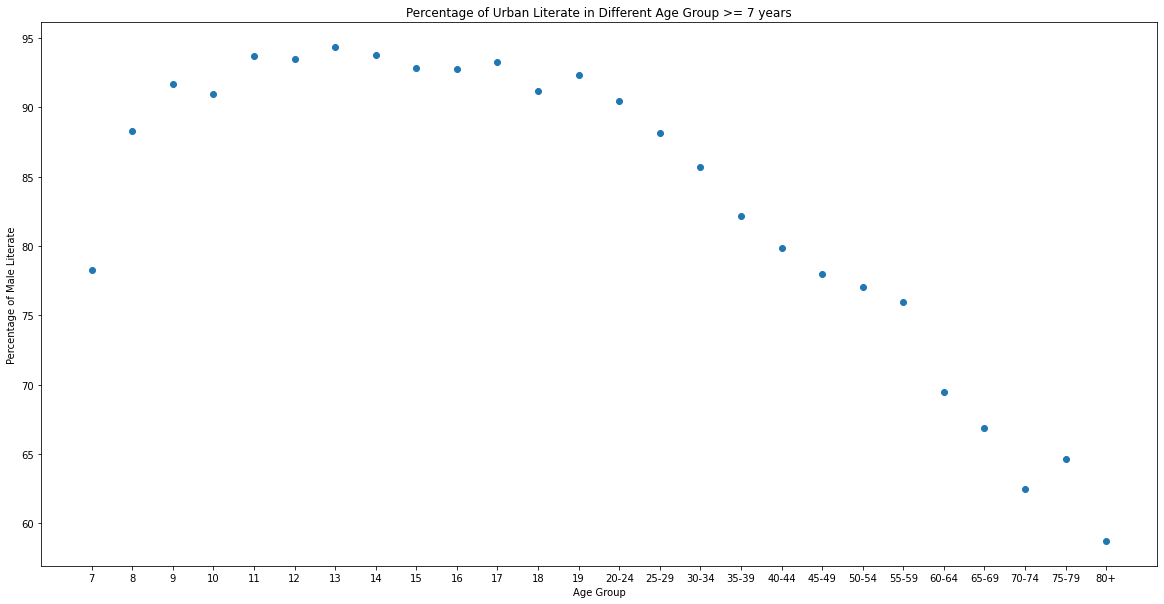

In [470]:
plt.scatter(df_u["Age Group"][2:-1].astype(str) ,df_u["total_lit_rate"][2:-1].astype(float))
plt.ylabel('Percentage of Male Literate')
plt.xlabel('Age Group')
plt.rcParams["figure.figsize"] = (20,10) # Custom figure size in inches
plt.title("Percentage of Urban Literate in Different Age Group >= 7 years")

print(df_u["total_lit_rate"][2:-1].describe())

count    26.000000
mean     88.096824
std       6.063106
min      74.638761
25%      85.121215
50%      90.640340
75%      93.223613
max      94.727483
Name: male_lit_rate, dtype: float64


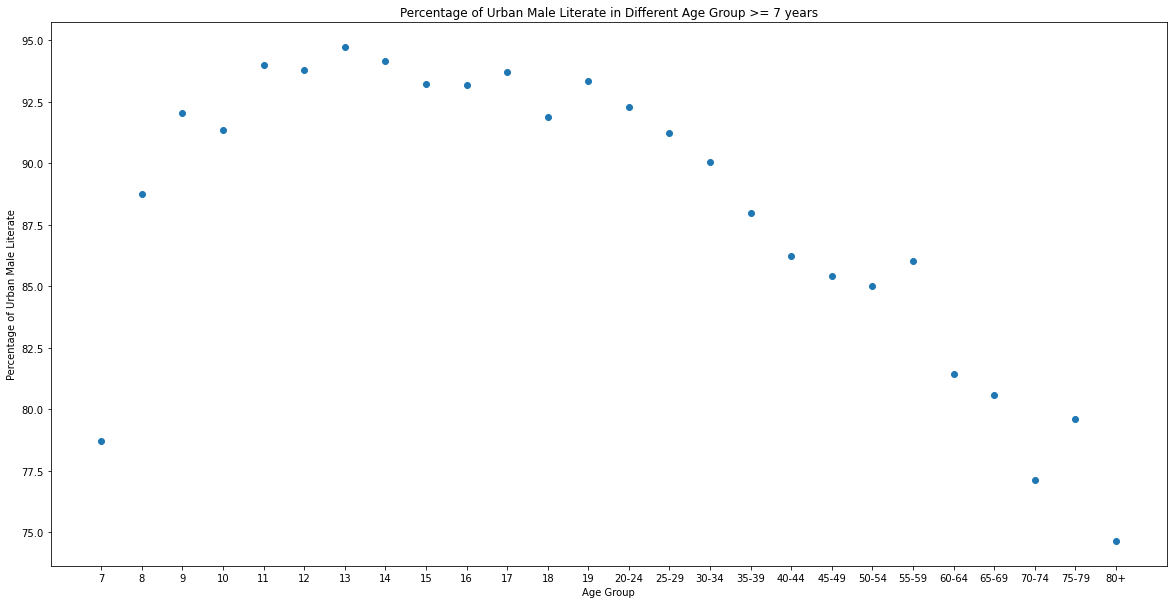

In [616]:
plt.scatter(df_u["Age Group"][2:-1].astype(str) ,df_u["male_lit_rate"][2:-1].astype(float))
plt.ylabel('Percentage of Urban Male Literate')
plt.xlabel('Age Group')
plt.rcParams["figure.figsize"] = (20,10) # Custom figure size in inches
plt.title("Percentage of Urban Male Literate in Different Age Group >= 7 years")

print(df_u["male_lit_rate"][2:-1].describe())

Ans - The trend clearly shows that among Urban Males Population, Literacy Rate is high among youths and it falls among the older population

count    26.000000
mean     78.507046
std      16.212851
min      45.826964
25%      68.428381
50%      86.342460
75%      92.011705
max      93.934427
Name: female_lit_rate, dtype: float64


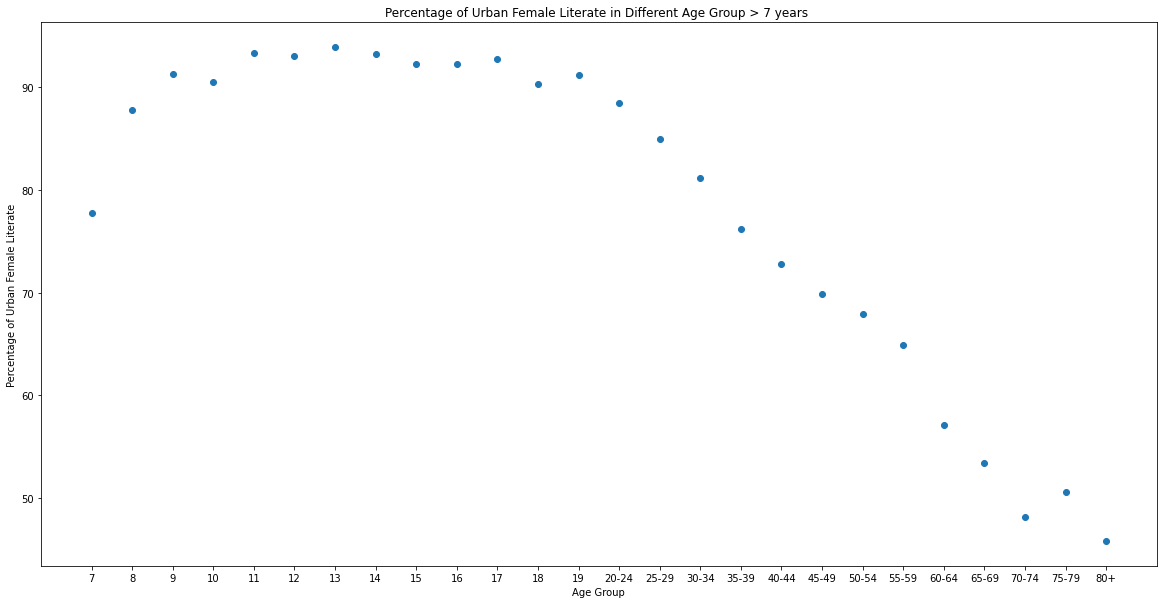

In [617]:
plt.scatter(df_u["Age Group"][2:-1].astype(str) ,df_u["female_lit_rate"][2:-1].astype(float))
plt.ylabel('Percentage of Urban Female Literate')
plt.xlabel('Age Group')
plt.rcParams["figure.figsize"] = (20,10) # Custom figure size in inches
plt.title("Percentage of Urban Female Literate in Different Age Group > 7 years ")


print(df_u["female_lit_rate"][2:-1].describe())

Ans - The trend clearly shows that among Urban Females Population, Literacy Rate is high among youths and it falls among the older population. There is high variation in Female Literacy Rate among different Age Groups. Thus Government policy making should be such that it focuses on those Age Groups where there is high scope of Improvement.

# For Rural India

In [478]:
df_r = df_lit_m[df_lit_m.Location_type == "Rural"][ df_lit_m["Area Name"] == 'INDIA']
df_r.reset_index(drop = True, inplace = True)
df_r.index.name = 'index'

<ipython-input-478-5e6d0d1972c9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_r = df_lit_m[df_lit_m.Location_type == "Rural"][ df_lit_m["Area Name"] == 'INDIA']


In [479]:
df_r["total_lit_rate"] = df_r.apply(literacy_rate,axis = 1)
df_r["male_lit_rate"] = df_r.apply(male_percentage,axis = 1)
df_r["female_lit_rate"] = df_r.apply(female_percentage,axis = 1)
df_r.drop(columns = ["Lit Males","Lit Females", "Area Name", "State", "Total Males", "Total Females"],inplace = True)

count    26.000000
mean     68.050272
std      22.794285
min      30.473123
25%      47.931907
50%      75.833592
75%      88.550163
max      91.843065
Name: total_lit_rate, dtype: float64


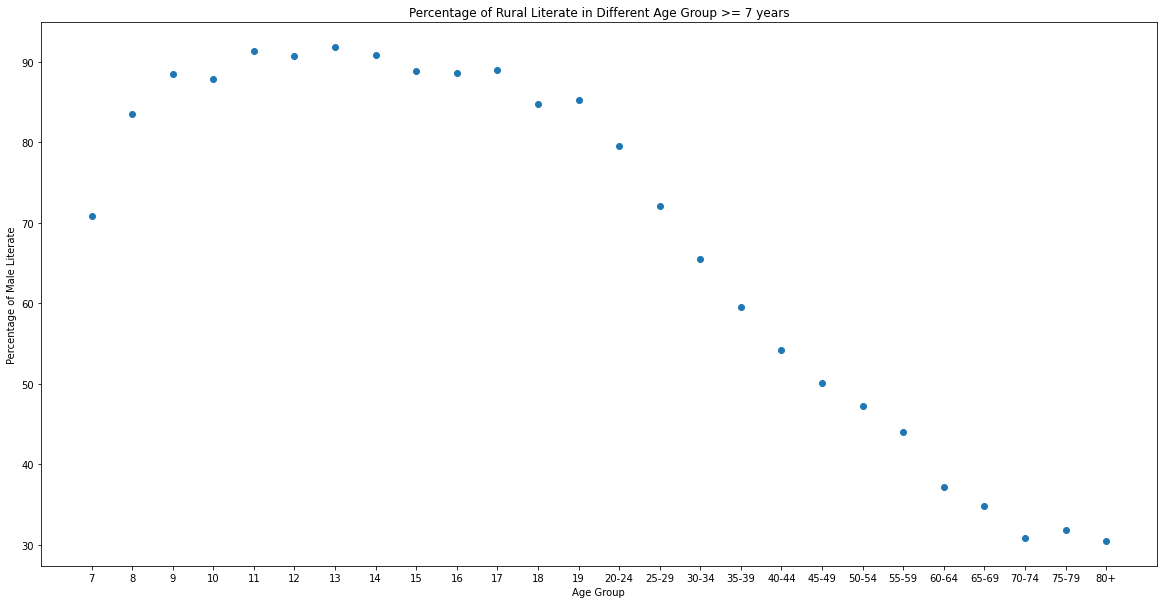

In [481]:
plt.scatter(df_r["Age Group"][2:-1].astype(str) ,df_r["total_lit_rate"][2:-1].astype(float))
plt.ylabel('Percentage of Male Literate')
plt.xlabel('Age Group')
plt.rcParams["figure.figsize"] = (20,10) # Custom figure size in inches
plt.title("Percentage of Rural Literate in Different Age Group >= 7 years")


print(df_r["total_lit_rate"][2:-1].describe())



count    26.000000
mean     76.133808
std      16.777445
min      44.990807
25%      62.812524
50%      83.346203
75%      90.640245
max      93.303609
Name: male_lit_rate, dtype: float64


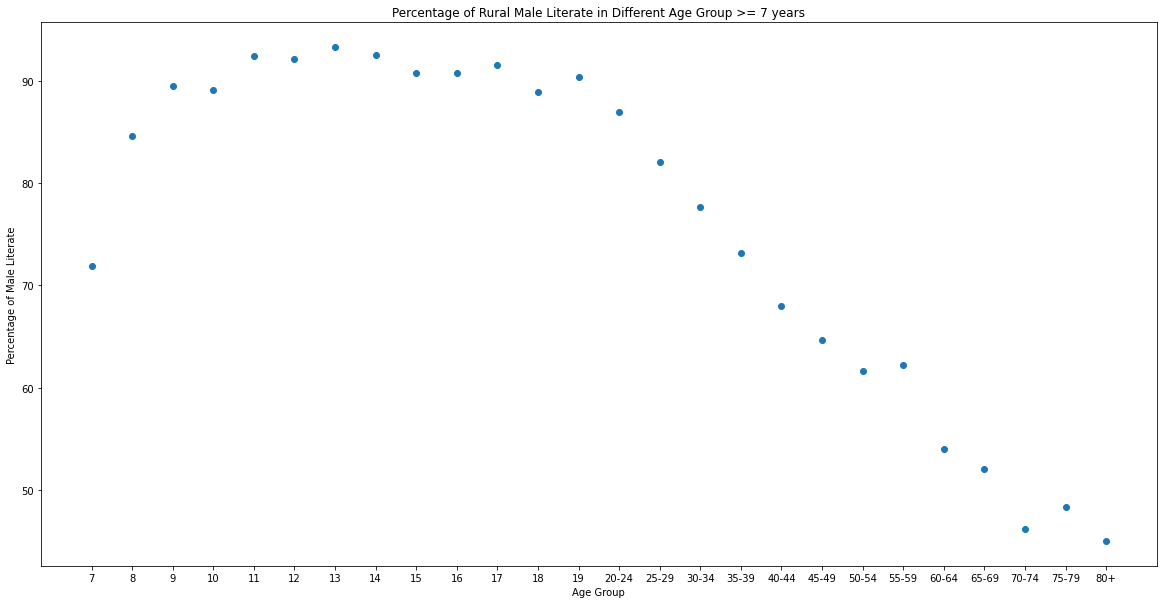

In [482]:
plt.scatter(df_r["Age Group"][2:-1].astype(str) ,df_r["male_lit_rate"][2:-1].astype(float))
plt.ylabel('Percentage of Male Literate')
plt.xlabel('Age Group')
plt.rcParams["figure.figsize"] = (20,10) # Custom figure size in inches
plt.title("Percentage of Rural Male Literate in Different Age Group >= 7 years")


print(df_r["male_lit_rate"][2:-1].describe())


count    26.000000
mean     59.869165
std      28.840100
min      15.297856
25%      32.199159
50%      70.674712
75%      86.478999
max      90.286151
Name: female_lit_rate, dtype: float64


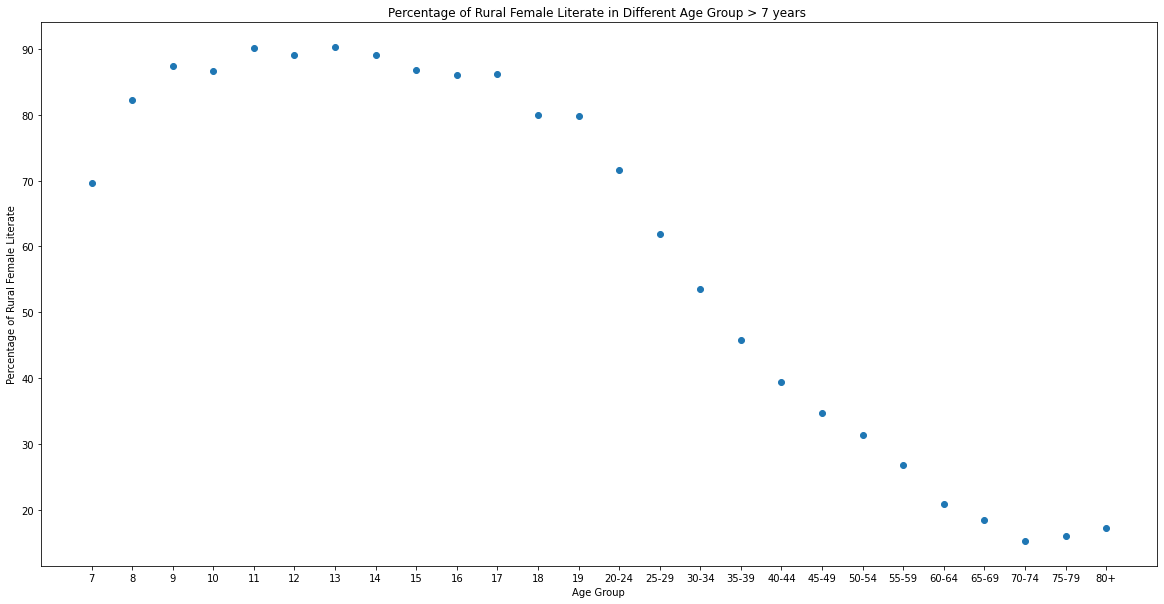

In [615]:
plt.scatter(df_r["Age Group"][2:-1].astype(str) ,df_r["female_lit_rate"][2:-1].astype(float))
plt.ylabel('Percentage of Rural Female Literate')
plt.xlabel('Age Group')
plt.rcParams["figure.figsize"] = (20,10) # Custom figure size in inches
plt.title("Percentage of Rural Female Literate in Different Age Group > 7 years ")

print(df_r["female_lit_rate"][2:-1].describe())

The trend in Rural Literacy Rate is similar to Urban Literacy Rate across Age Groups. But the Absolute magnitudes are lower for Rural Literacy Rate Vs Urban Literacy Rate.

# Question 3 -  “Majority of the Indian women’s complete the Matric level education”. Validate the statement. 

In [618]:
df_female = df_total_m[ df_total_m["Area Name"] == 'INDIA'][df_total_m.Location_type == "Total"]
df_female.reset_index(drop = True, inplace = True)
df_female.index.name = 'index'

<ipython-input-618-07eeff816f29>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_female = df_total_m[ df_total_m["Area Name"] == 'INDIA'][df_total_m.Location_type == "Total"]


In [619]:
df.iloc[1].dropna()

Unnamed: 0                                 Name
Unnamed: 1                                 Code
Unnamed: 2                                 Code
Unnamed: 4                               Rural/
Unnamed: 15                    Literate without
Unnamed: 18                               Below
Unnamed: 21                             Primary
Unnamed: 24                              Middle
Unnamed: 27                    Matric/Secondary
Unnamed: 30       Higher secondary/Intermediate
Unnamed: 33            Non-technical diploma or
Unnamed: 36    Technical diploma or certificate
Unnamed: 39                    Graduate & above
Unnamed: 42                        Unclassified
Name: 1, dtype: object

In [620]:
df_metric =  df[["Unnamed: 27","Unnamed: 28","Unnamed: 29"]]
df_metric = df_metric[6:]
df_metric.rename(columns = {"Unnamed: 27" : "Total Metric Pass","Unnamed: 28": "Total metric Males", "Unnamed: 29" : "Total metric Females"} , inplace = True)
df_metric.reset_index(drop = True, inplace = True)
df_metric.index.name = 'index'
df_metric.head()

,Total Metric Pass,Total metric Males,Total metric Females
index,,,
0,105939743,63769834,42169909
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [603]:
df_metric_m = pd.merge(df_standard,df_metric , how = 'left', on = 'index')
df_metric_m = df_metric_m[ df_metric_m["Area Name"] == 'INDIA'][df_metric_m.Location_type == "Total"]
df_metric_m.drop(columns = ["State","Area Name","Location_type","Age Group"],inplace = True)
df_metric_m.reset_index(drop = True, inplace = True)
df_metric_m.index.name = 'index'

<ipython-input-603-9e8def00709b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metric_m = df_metric_m[ df_metric_m["Area Name"] == 'INDIA'][df_metric_m.Location_type == "Total"]


In [606]:
df_metric_m = pd.merge(df_female, df_metric_m, how = 'left', on = 'index')

In [607]:
def female_metric_percentage(x):
    return 100*x["Total metric Females"]/x["Total Females"]



In [611]:
df_metricf = df_metric_m[df_metric_m["Total metric Females"] != 0]
df_metricf["female_metric_rate"] = df_metricf.apply(female_metric_percentage,axis = 1)
df_metricf.drop(columns = ["Total metric Males","Total metric Females", "Area Name", "State", "Total Males", "Total Persons"],inplace = True)
df_metricf.reset_index(drop = True, inplace = True)
df_metricf.index.name = 'index'
df_metricf.head()

<ipython-input-611-fc04f2a38c74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metricf["female_metric_rate"] = df_metricf.apply(female_metric_percentage,axis = 1)
/Users/yashbhinwal/PycharmProjects/myfirstpython/venv/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Location_type,Age Group,Total Females,Total Metric Pass,female_metric_rate
index,,,,,
0,Total,All ages,587584719,105939743,7.176822
1,Total,15,12159708,5455958,21.389617
2,Total,16,11564358,9253218,37.768435
3,Total,17,9868018,10472756,48.975113
4,Total,18,12937296,5249030,17.309854


count    17.000000
mean     11.273505
std      13.025528
min       1.822065
25%       3.092566
50%       6.904456
75%      11.416692
max      48.975113
Name: female_metric_rate, dtype: float64


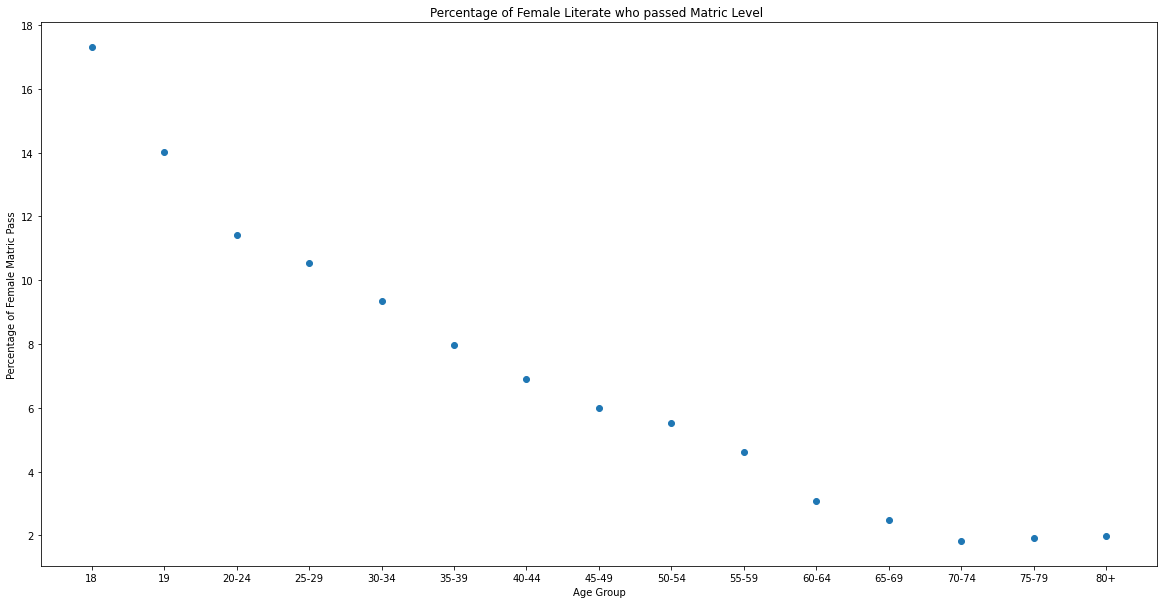

In [614]:
plt.scatter(df_metricf["Age Group"][4:-1].astype(str) ,df_metricf["female_metric_rate"][4:-1].astype(float))
plt.ylabel('Percentage of Female Matric Pass')
plt.xlabel('Age Group')
plt.rcParams["figure.figsize"] = (20,10) # Custom figure size in inches
plt.title("Percentage of Female Literate who passed Matric Level ")

print(df_metricf["female_metric_rate"][2:-1].describe())

# Ans 4 - The given statement is false as majority of Females are not Metric Passed

# Ques 5 - “Illiteracy rate is high in the age level below 10”. Validate the statement.

In [655]:
df_below10 = df_ill_m[ df_ill_m["Area Name"] == 'INDIA'][df_ill_m.Location_type == "Total"]
df_below10 = df_below10[1:5]

<ipython-input-655-0b87a32d10be>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_below10 = df_ill_m[ df_ill_m["Area Name"] == 'INDIA'][df_ill_m.Location_type == "Total"]


In [656]:
df_below10

,State,Area Name,Location_type,Age Group,Total Ill Persons,Ill Males,Ill Females,Total Persons,Total Males,Total Females
index,,,,,,,,,,
1,00,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999
2,00,INDIA,Total,7,6748214,3388683,3359531,24826640,12903364,11923276
3,00,INDIA,Total,8,4131414,2013742,2117672,26968373,14061937,12906436
4,00,INDIA,Total,9,2491904,1198339,1293565,23424638,12214985,11209653


In [657]:
def ill_rate(x):
    return 100*x["Total Ill Persons"]/x["Total Persons"]




In [658]:
df_below10["ill_rate"] = df_below10.apply(ill_rate,axis = 1)

In [659]:
df_below10

,State,Area Name,Location_type,Age Group,Total Ill Persons,Ill Males,Ill Females,Total Persons,Total Males,Total Females,ill_rate
index,,,,,,,,,,,
1,00,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,100.000000
2,00,INDIA,Total,7,6748214,3388683,3359531,24826640,12903364,11923276,27.181342
3,00,INDIA,Total,8,4131414,2013742,2117672,26968373,14061937,12906436,15.319478
4,00,INDIA,Total,9,2491904,1198339,1293565,23424638,12214985,11209653,10.637962


In [661]:
df_below10.describe()

,ill_rate
count,4.000000
mean,38.284696
std,41.728513
min,10.637962
25%,14.149099
50%,21.250410
75%,45.386007
max,100.000000


# Ans 5- The given statement is false, illetracy rate is 100 % for 0-6 years age group, but for 7-9 years, illetracy rate is very low. The mean illetracy rate for 0-9 years is 38.2%

# Identify the top 5 states where literacy rate is very high in the education levels above 10th standard.                                                                                          

In [686]:

df_lit_10 = df_lit_m[df_lit_m["Age Group"] == 10][df_lit_m["Area Name"] != 'INDIA']
df_lit_10

<ipython-input-686-161aabfee30f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_lit_10 = df_lit_m[df_lit_m["Age Group"] == 10][df_lit_m["Area Name"] != 'INDIA']


,State,Area Name,Location_type,Age Group,Total Lit Persons,Lit Males,Lit Females,Total Persons,Total Males,Total Females
index,,,,,,,,,,
92,01,State - JAMMU & KASHMIR,Total,10,262171,142328,119843,314283,166773,147510
121,01,State - JAMMU & KASHMIR,Rural,10,201507,109212,92295,244857,129213,115644
150,01,State - JAMMU & KASHMIR,Urban,10,60664,33116,27548,69426,37560,31866
179,02,State - HIMACHAL PRADESH,Total,10,128421,68520,59901,134596,71647,62949
208,02,State - HIMACHAL PRADESH,Rural,10,116810,62081,54729,122334,64852,57482
...,...,...,...,...,...,...,...,...,...,...
2992,34,State - PUDUCHERRY,Rural,10,7070,3550,3520,7480,3743,3737
3021,34,State - PUDUCHERRY,Urban,10,14394,7369,7025,14988,7690,7298
3050,35,State - ANDAMAN & NICOBAR ISLANDS,Total,10,6769,3454,3315,7051,3608,3443


In [687]:
def male_percentage(x):
    return 100*x["Lit Males"]/x["Total Males"]
def female_percentage(x):
    return 100*x["Lit Females"]/x["Total Females"]
def literacy_rate(x):
    return 100*x["Total Lit Persons"]/x["Total Persons"]

In [688]:
df_lit_10["total_lit_rate"] = df_lit_10.apply(literacy_rate,axis = 1)
df_lit_10["male_lit_rate"] = df_lit_10.apply(male_percentage,axis = 1)
df_lit_10["female_lit_rate"] = df_lit_10.apply(female_percentage,axis = 1)
df_lit_10.drop(columns = ["Lit Males","Lit Females", "State", "Total Males", "Total Females"],inplace = True)

In [689]:
df_lit_10FE_Assignment1_<Student_ID>

,Area Name,Location_type,Age Group,Total Lit Persons,Total Persons,total_lit_rate,male_lit_rate,female_lit_rate
index,,,,,,,,
92,State - JAMMU & KASHMIR,Total,10,262171,314283,83.418766,85.342352,81.243983
121,State - JAMMU & KASHMIR,Rural,10,201507,244857,82.295789,84.520907,79.809588
150,State - JAMMU & KASHMIR,Urban,10,60664,69426,87.379368,88.168264,86.449507
179,State - HIMACHAL PRADESH,Total,10,128421,134596,95.412196,95.635546,95.157985
208,State - HIMACHAL PRADESH,Rural,10,116810,122334,95.484493,95.727194,95.210675
...,...,...,...,...,...,...,...,...
2992,State - PUDUCHERRY,Rural,10,7070,7480,94.518717,94.843708,94.193203
3021,State - PUDUCHERRY,Urban,10,14394,14988,96.036829,95.825748,96.259249
3050,State - ANDAMAN & NICOBAR ISLANDS,Total,10,6769,7051,96.000567,95.731707,96.282312


In [691]:
df_lit_10 = df_lit_10.sort_values(by='total_lit_rate',ascending=False)

In [694]:
df_lit_10[df_lit_10.Location_type == 'Total'][:10]

,Area Name,Location_type,Age Group,Total Lit Persons,Total Persons,total_lit_rate,male_lit_rate,female_lit_rate
index,,,,,,,,
2789,State - KERALA,Total,10,568744,580680,97.944479,97.926083,97.963697
2876,State - TAMIL NADU,Total,10,1247285,1290991,96.614539,96.747974,96.472043
2615,State - GOA,Total,10,22844,23764,96.128598,96.404403,95.834420
3050,State - ANDAMAN & NICOBAR ISLANDS,Total,10,6769,7051,96.000567,95.731707,96.282312
2963,State - PUDUCHERRY,Total,10,21464,22468,95.531422,95.504242,95.559583
179,State - HIMACHAL PRADESH,Total,10,128421,134596,95.412196,95.635546,95.157985
2180,State - DAMAN & DIU,Total,10,3551,3732,95.150054,95.660949,94.571429
1397,State - TRIPURA,Total,10,70531,74446,94.741155,95.084196,94.378764
2702,State - LAKSHADWEEP,Total,10,1247,1319,94.541319,95.163807,93.952802
